In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fraud_data = pd.read_csv('fraudTrain.csv')

In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])


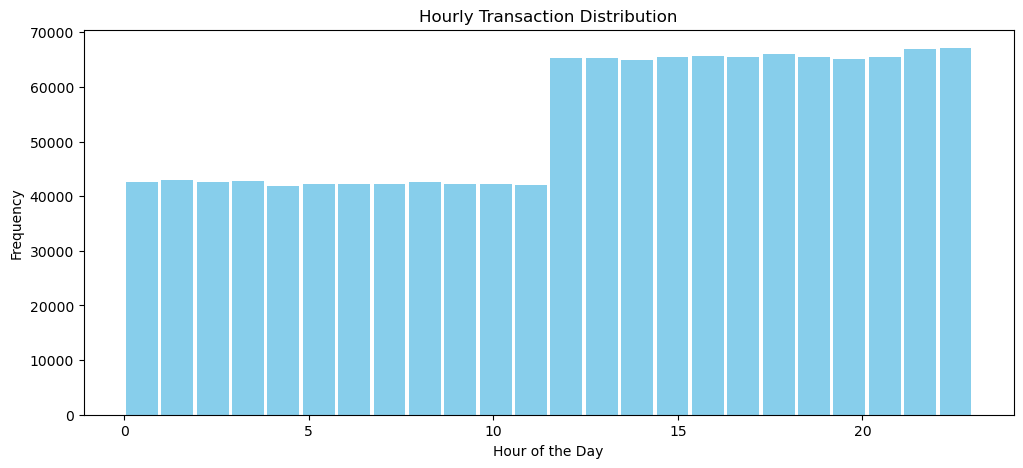

In [5]:
plt.figure(figsize=(12, 5))
fraud_data['trans_date_trans_time'].dt.hour.plot(kind='hist', bins=24, rwidth=0.9, color='skyblue')
plt.title('Hourly Transaction Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

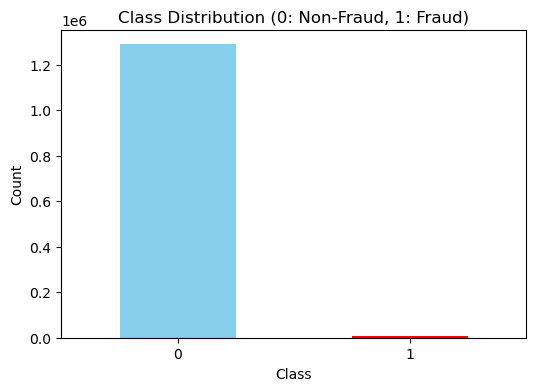

In [6]:
plt.figure(figsize=(6, 4))
fraud_data['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
fraud_data['amt_decimal'] = fraud_data['amt'] % 1

fraud_data['trans_date_trans_time'] = fraud_data['trans_date_trans_time'].astype(str)

fraud_data['transaction_date'] = pd.to_datetime(fraud_data['trans_date_trans_time'].str.split(' ').str[0])
fraud_data['cardholder_age'] = (fraud_data['transaction_date'] - pd.to_datetime(fraud_data['dob'])).dt.days // 365

In [8]:
fraud_data['amt_to_city_pop_ratio'] = fraud_data['amt'] / fraud_data['city_pop']

print(fraud_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())

   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.97              30               0.001422
1         0.23              40               0.719664
2         0.11              56               0.052987
3         0.00              52               0.023208
4         0.96              32               0.423838


In [9]:
columns_to_drop = [
    'Unnamed: 0',
    'cc_num',
    'trans_date_trans_time',
    'transaction_date',
    'first',
    'last',
    'street',
    'city',
    'state',
    'zip',
    'dob',
    'trans_num',
]


fraud_data = fraud_data.drop(columns=columns_to_drop)


fraud_data.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,amt_decimal,cardholder_age,amt_to_city_pop_ratio
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0.97,30,0.001422
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,0.23,40,0.719664
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0.11,56,0.052987
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0.00,52,0.023208
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0.96,32,0.423838


In [10]:
testing_data = pd.read_csv('fraudTest.csv')

In [11]:
testing_data = testing_data.dropna()

In [12]:
testing_data['amt_decimal'] = testing_data['amt'] % 1


testing_data['trans_date_trans_time'] = testing_data['trans_date_trans_time'].astype(str)


testing_data['transaction_date'] = pd.to_datetime(testing_data['trans_date_trans_time'].str.split(' ').str[0])
testing_data['cardholder_age'] = (testing_data['transaction_date'] - pd.to_datetime(testing_data['dob'])).dt.days // 365


testing_data['amt_to_city_pop_ratio'] = testing_data['amt'] / testing_data['city_pop']


print(testing_data[['amt_decimal', 'cardholder_age', 'amt_to_city_pop_ratio']].head())


   amt_decimal  cardholder_age  amt_to_city_pop_ratio
0         0.86              52               0.000009
1         0.84              30               0.098808
2         0.28              49               0.001197
3         0.05              32               0.001096
4         0.19              65               0.002833


In [13]:
testing_data = testing_data.drop(columns=columns_to_drop)

In [14]:
fraud_data = fraud_data.dropna()


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'merchant', 'category', 'job']
for col in categorical_columns:
    fraud_data[col] = label_encoder.fit_transform(fraud_data[col])
    testing_data[col] = label_encoder.fit_transform(testing_data[col])

In [15]:
from sklearn.preprocessing import StandardScaler

X_train = fraud_data.drop(columns=['is_fraud'])
y_train = fraud_data['is_fraud']

In [16]:
X_val = testing_data.drop(columns=['is_fraud'])
y_val = testing_data['is_fraud']

In [17]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


model.fit(X_train, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy*100)

99.61401355721146
